# Baby Project: Exploring Health Animal Bites
January 29 Crystal Nguyen

# Import Packages

In [4]:
# for data analysis and manipulation
import pandas as pd 

# for numerical computing and arrays
import numpy as np

# for creating graphs and charts
import matplotlib.pyplot as plt

# makes charts more beautiful
import seaborn as sns

# and display charts inline
%matplotlib inline

## Import Data

In [5]:
# import dataset as df
df = pd.read_csv("../data/Health_AnimalBites.csv")

# Explore Data

In [6]:
# inspect rows
df.head(5)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [7]:
# number of rows and columns
df.shape

(9003, 15)

In [8]:
# number of NA values per column
df.isna().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

In [9]:
# check for number of different colors
len(df["color"].unique())

713

In [10]:
# inspect summary stats to see different types of issues
df.describe(include = 'all').round(2)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
count,8686,8885,3759,6477,6426,3738.00,4115,7165,2565,8387,2020,1535,395,1445,1543
unique,2702,9,101,3,712,NaN,2107,233,2,3,602,4,325,582,3
top,2017-08-15 00:00:00,DOG,PIT BULL,MALE,BLACK,NaN,2015-10-01 00:00:00,40272,NO,BODY,2010-04-05 00:00:00,RELEASED,2010-05-21 00:00:00,2016-07-05 00:00:00,UNKNOWN
freq,13,7029,1102,3832,671,NaN,8,376,1914,6213,18,912,4,13,1240
mean,NaN,NaN,NaN,NaN,NaN,1.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inspect bite_date
- Identifying max and min years
- Removing invalid year rows

In [11]:
# convert bite_date values to datetime data type and turn out-of-bound dates to NaT values
df['bite_date'] = pd.to_datetime(df['bite_date'], errors= 'coerce')

# show rows outside of valid year range
outliers = df[(df['bite_date'].dt.year < 1900) | (df['bite_date'].dt.year > 2026)]
outliers

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1512,2101-02-18,CAT,NaN,FEMALE,BLACK,NaN,NaN,40202,NaN,BODY,2011-02-18 00:00:00,RELEASED,NaN,NaN,NaN
5055,2201-01-21,CAT,NaN,MALE,GRAY,NaN,NaN,NaN,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
6293,2201-02-21,DOG,PIT BULL,MALE,TAN WHITE,1.0,2015-04-21 00:00:00,NaN,NaN,BODY,NaN,NaN,NaN,NaN,NaN
6505,2201-05-01,DOG,DACHSHUND,MALE,BROWN,1.0,2015-05-19 00:00:00,40229,NO,BODY,NaN,RELEASED,NaN,2015-05-11 00:00:00,NaN


In [12]:
# check for oldest and newest data entry is
print(df['bite_date'].min())
print(df['bite_date'].max())

1952-05-28 00:00:00
2201-05-01 00:00:00


### Cleaning bite_date

In [13]:
# keep only rows with years between 1900 and 2026
df = df[(df['bite_date'].dt.year >= 1900) & (df['bite_date'].dt.year <= 2026)]

## Renaming Columns 
- This data set has long confusing column names that are tedious to type out in code
- Renaming the column names will solve this issue

In [14]:
df.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

In [15]:
# setting original column names to new and shortend column names
df.rename(columns = {
    'SpeciesIDDesc': 'species',
    'BreedIDDesc': 'breed',
    'GenderIDDesc': 'gender',
    'vaccination_yrs': 'vax_yr',
    'vaccination_date': 'vax_date',
    'quarantine_date': 'qrtn_date',
    'AdvIssuedYNDesc': 'adv_issued',
    'WhereBittenIDDesc': 'bite_spot',
    'DispositionIDDesc': 'released',
    'ResultsIDDesc': 'rabies_results'}, inplace=True)

## Findings:
- There are 9003 total rows
- Data collection time frame is between 1952 to 2021
- All columns are non-numeric except for vaccination_yrs (victim_zip is not true numeric data)
- Dog are the most common species with 7029 rows
- Pitbull are the most common breed with 1102 rows
- The most common color among animals is black with 671 rows
- Animals are vaccinated on average, within 1.45 years
- Data completeness varies widely across columns; bite_date with 8686 rows compared to AdvissuedYNDesc with 2565 rows
- Validity & accuracy issues: 4 rows containing 2201 or 2101 as the year in bite_date, this is both invalid and not accurate and is likely due to an input error
- Data consistency issues: the color column contains 706 unique color inputs, indicating that there is no structure for color input

# Summaries and Graphs
- Species without recorded breed values are excluded when grouping by both species and breed. To keep these records, I filled missing breed values with 'Unknown'

In [16]:
# Replace missing values with 'Unknown'
df['breed'].fillna('Unknown', inplace=True)

C:\Users\cryst\AppData\Local\Temp\ipykernel_16708\2489488099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['breed'].fillna('Unknown', inplace=True)


In [17]:
# first group by species, then breed
df.groupby(['species','breed']).size()

species  breed       
BAT      Unknown           76
CAT      BEAGLE             1
         OTHER              1
         Unknown         1531
DOG      AAUST. TERR.      77
                         ... 
HORSE    Unknown            5
OTHER    Unknown            8
RABBIT   Unknown            3
RACCOON  Unknown           21
SKUNK    Unknown            1
Length: 112, dtype: int64

## Graphs

### Number of Bites by Species Bar Chart

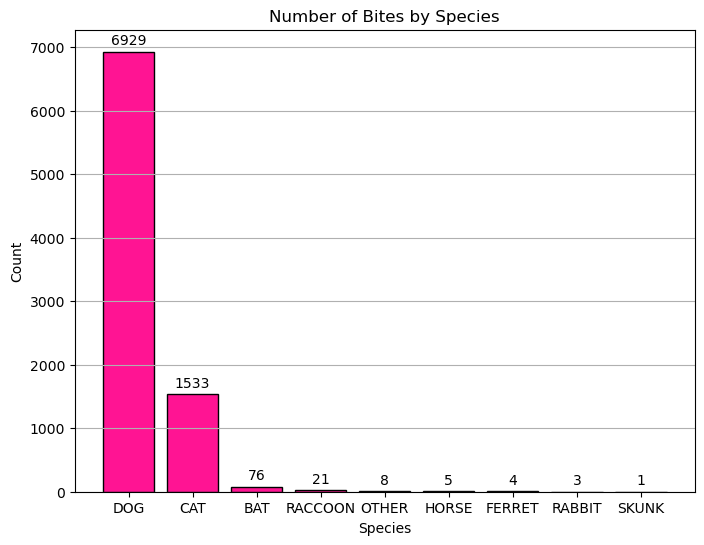

In [18]:
# count the number of species in df
species_count = df['species'].value_counts()

# set dimensions for the chart
plt.figure(figsize=(8,6))

# define characteristics of chart, plotting count of species (y) against species names (x), saved as a variable bar
bar = plt.bar(x=species_count.index, height=species_count.values, 
               color='deeppink', edgecolor='black')

# set chart title
plt.title('Number of Bites by Species')

# set x and y axis titles
plt.xlabel('Species')
plt.ylabel('Count')

# add grid Lines and data labels for clarity
plt.grid(axis='y')
plt.bar_label(bar, padding=3);

### Findings
- Dogs dominate with 6929 bites (81% of all bites), that is more than all other species combined,
- Cats come in second with 1533 bites, only representing 18% of all incidents.
- All other species only account for approximately 1% of all incidents.
- This data suggests that bite frequency correlates with how much time humans spend around animals. Dogs and cats are common pets, while wild life and humans are not in frequent contact.

### Animal Bite Trends (1952-2021) Line Chart

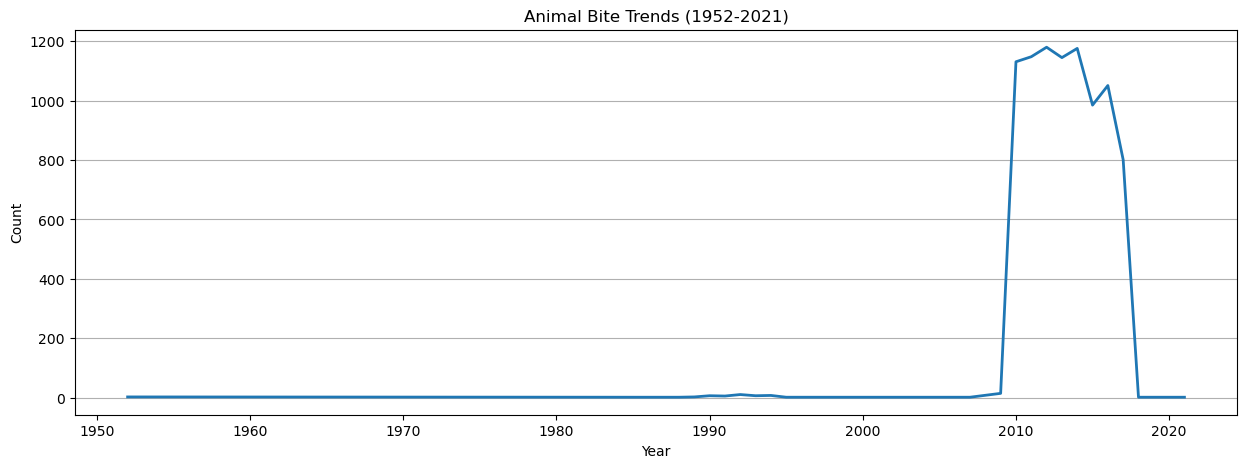

In [19]:
# extract only the year from bite_date
bite_years = df['bite_date'].dt.year

# group years together and count number of years within each group
year_count = df.groupby(bite_years).size()

# set chart dimensions
plt.figure(figsize=(15,5))

# define chart values, title, axis titles
plt.plot(year_count.index,year_count.values, linewidth=2)
plt.title('Animal Bite Trends (1952-2021)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(axis='y')

##### Findings
- From 1952 to approximately 2010, animal bite incidents remained consistently low. This suggests either limited data collection or genuinely low bite incidents.
- There is a significant spike in 2010 which plateaus until approximately 2015. This spike indicates a new reporting system that streamlined data collection, rather than more bite incidents.
- After 2015, there is a slow downward trend, followed by a sharp drop in 2017. This suggests data collection phasing out or policy changes reducing incidents

Text(0.5, 1.0, 'Top 10 Dog Colors Comparison')

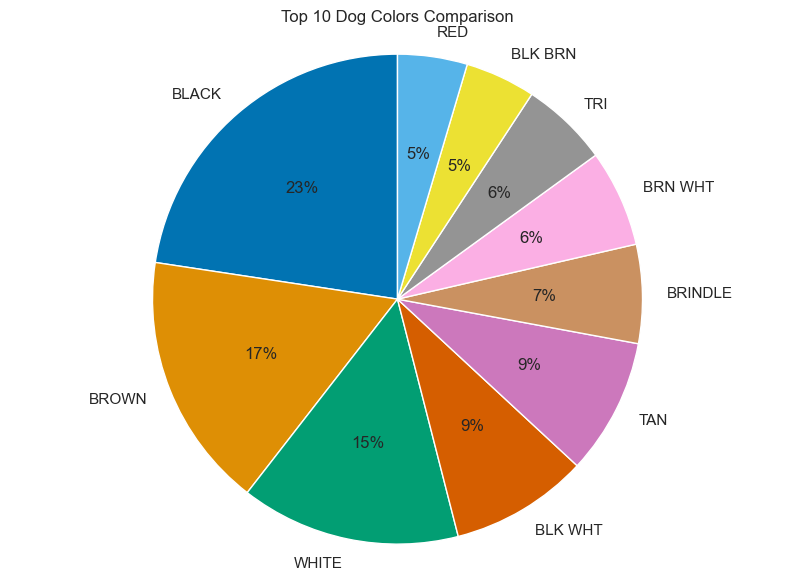

In [20]:
# get top 10 most common dog colors
top_colors_dog = df[df['species']=='DOG']['color'].value_counts().head(10)

# extract color names for chart labels
color_labels = top_colors_dog.index.tolist()

# extract count values for chart data
color_count = top_colors_dog.values.tolist()

# set visual theme to white background
sns.set_theme(style = 'whitegrid') 

# define a Seaborn color pallete with exactly as many colors as there are colors in top_colors_dog
colors = sns.color_palette('colorblind')[0:len(top_colors_dog)]

# define figure size
plt.figure(figsize=(10, 7))

# create pie chart with percentages and starting angle at 90 degrees
plt.pie(x=top_colors_dog, labels=color_labels, colors=colors, autopct='%.0f%%', startangle=90)

# ensure the chart is a circle not oval
plt.axis('equal')

# add chart title
plt.title('Top 10 Dog Colors Comparison')

### Findings
- Solid colors dominate: Black (23%), Brown (17%), and White (15%) together account for 55% of all dogs showing a strong preference for single color dogs
- Multi-color dogs are common as well: BLK WHT, TAN, BRINDLE, BRN WHT, TRI, BLK BRN represent 45% of the top 10